### Import all the necessary modules, packages, and libraries to complete this assignment.

In [1]:
%matplotlib inline
%config InlineBackend.print_figure_kwargs={'bbox_inches':None}
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
from time import time
from math import sqrt
from sklearn import linear_model, model_selection
from sklearn.preprocessing import minmax_scale as scale
from sklearn.exceptions import DataConversionWarning
import warnings
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
import tensorflow as tf

# 1 (30pts) Polynomial regression / overfitting / regularization

### Read in first dataset

In [2]:
data = pd.read_csv('ex2data1.csv')

## 1-1 Fit the data using linear (1st order) regression model (matrix form, gradient descent method). Plot the data with the fitted line. Print optimized weights. Print Root Mean Squared Error (RMSE).

### Initialize learning rates, data,  labels, and weights; define cost, cost derivative, and weight updating functions

In [3]:
learning_rates = [0.1, 0.01, 1e-3, 1e-4]

X = np.stack([
        np.ones((len(data))),
        data.iloc[:, 0]],
        axis=1)
y = np.asmatrix(data.iloc[:, -1]).reshape(len(data), -1)

W_init = np.asmatrix(np.array([0., 0.]).reshape(2, -1))
W = np.copy(W_init)

J = lambda X, y: (1/len(data)) * np.dot((np.dot(X, W) - y).T, np.dot(X, W) - y)
dJ_dW = lambda X, y: (2/len(data)) * (np.dot(np.dot(X.T, X), W) - np.dot(X.T, y))

def update_weights(W, alpha):
    W -= alpha*dJ_dW(X, y)
    return W

### Define data and model plot functions

In [4]:
def data_plotter(title):
    formatting = {'fontsize': 15, 'weight': 'bold'}
    plt.title(title, formatting)
    plt.xlabel('X', formatting)
    plt.ylabel('Y', formatting, rotation=0)
    plt.xlim(min(data.iloc[:, 0]) - (2 * min(data.iloc[:, 0])), 
             max(data.iloc[:, 0]) + (.1 * max(data.iloc[:, 0])))
    plt.ylim(min(data.iloc[:, -1]) - (2 * min(data.iloc[:, 0])), 
             max(data.iloc[:, -1]) + (.2 * max(data.iloc[:, 0])))
    plt.grid(True)
    plt.scatter(data.iloc[:, 0], data.iloc[:, -1])

def model_plotter(model):
    Y_hat = np.array(list(map(model, X[:,1])))
    pairs = sorted(zip(data.iloc[:, 0], Y_hat))
    plt.plot([p[0] for p in pairs], [p[1] for p in pairs]) 

### Define learning function

In [6]:
def train_model(X, y, learning_rates, suppress_results=False, test_split=None):
    global W, W_init
    print('Initial RMSE: {}'.format(sqrt(float(J(X, y)))))

    results = []
    for alpha in learning_rates:
    
        W = np.copy(W_init)
        print('Performing gradient descent with a learning rate of {}'.format(alpha))

        new_cost, old_cost, start, count = float(J(X, y)), float('inf'), time(), 0
        beginning = start
        while new_cost < old_cost and abs(old_cost - new_cost) > 1e-5:
            old_cost = float(new_cost)
            W = update_weights(W, alpha)
            new_cost = float(J(X, y))
            if time() - start > 3:
                print('\tCost: {}'.format(new_cost))
                start = time()
            count += 1
        end = time()
            
        print('\n\tFinal RMSE: {:{align}{width}} achieved after {time:.2f} seconds {count} iterations\n'.format( 
            sqrt(J(X, y)), 
            align='>', 
            width=8-len(str(alpha))+len(str(sqrt(J(X, y)))),
            time=end-beginning,
            count=count))
    
        if test_split:
            results.append([sqrt(J(test_split[0], test_split[1])), alpha, W])
        else:
            results.append([sqrt(J(X, y)), alpha, W])
    
    if not suppress_results:
        print('\nThe best model has:\n\tRMSE = {}\n\tlearning rate = {}\n\tW = {}'.format(min(results)[0], min(results)[1], '\n\t    '.join([str(float(r)) for r in min(results)[2]]))) 
    return results

### Perform matrix form gradient descent on the first dataset to fit a 1st order linear model

In [7]:
"""
The best model has:
    RMSE = 0.4766740219858785
    learning rate = 0.1
    W = 1.0348563527735277
        -1.1151457964875555
"""

results = train_model(X, y, learning_rates)

Initial RMSE: 0.7335894087051757
Performing gradient descent with a learning rate of 0.1

	Final RMSE:      0.4766740219858785 achieved after 0.01 seconds 249 iterations

Performing gradient descent with a learning rate of 0.01

	Final RMSE:     0.48070713662629017 achieved after 0.04 seconds 1502 iterations

Performing gradient descent with a learning rate of 0.001

	Final RMSE:    0.5193038157458554 achieved after 0.11 seconds 5142 iterations

Performing gradient descent with a learning rate of 0.0001

	Final RMSE:   0.6061032858949542 achieved after 0.11 seconds 4875 iterations


The best model has:
	RMSE = 0.4766740219858785
	learning rate = 0.1
	W = 1.0348563527735277
	    -1.1151457964875555


### Plot first dataset with the 1st order linear model fit to it

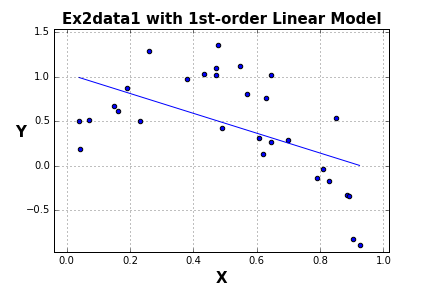

In [8]:
data_plotter('Ex2data1 with 1st-order Linear Model')
W0, W1 = [float(w) for w in min(results)[-1]]
model = lambda x: W0 + W1*x
model_plotter(model)

## 1-2 Fit the data using 2nd-order polynomial regression model (matrix form, gradient descent method). Plot the data with the fitted line. Print optimized weights. Print Root Mean Squared Error (RMSE). Note: Do not forget feature normalization.

### Initialize data, labels, and weights

In [9]:
X = np.stack([
        np.ones((len(data))),
        scale(data.iloc[:, 0]),
        scale(list(map(lambda x: x**2, data.iloc[:, 0])))],
        axis=1)
y = np.asmatrix(data.iloc[:, -1]).reshape(len(data), -1)

W_init = np.asmatrix(np.array([0., 0., 0.]).reshape(-1, 1))
W = np.copy(W_init)

### Perform matrix form gradient descent on the first dataset to fit a 2nd order polynomial model

In [10]:
"""
The best model has:
    RMSE = 0.2990640544013716
    learning rate = 0.1
    W = 0.5316078954639762
        2.543096217706851
        -3.6008283578344193
"""

results = train_model(X, y, learning_rates)

Initial RMSE: 0.7335894087051757
Performing gradient descent with a learning rate of 0.1

	Final RMSE:      0.2990640544013716 achieved after 0.05 seconds 2052 iterations

Performing gradient descent with a learning rate of 0.01

	Final RMSE:     0.3998790687268308 achieved after 0.05 seconds 2482 iterations

Performing gradient descent with a learning rate of 0.001

	Final RMSE:    0.4463382369183588 achieved after 0.11 seconds 4928 iterations

Performing gradient descent with a learning rate of 0.0001

	Final RMSE:   0.5899631357770813 achieved after 0.14 seconds 6317 iterations


The best model has:
	RMSE = 0.2990640544013716
	learning rate = 0.1
	W = 0.5316078954639762
	    2.543096217706851
	    -3.6008283578344193


### Plot first dataset with the 2nd order polynomial regression model fit to it

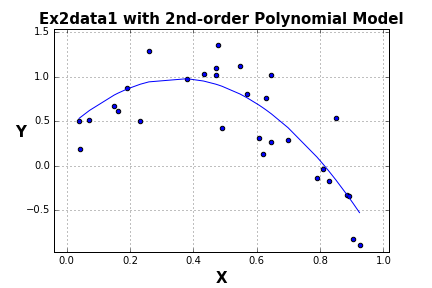

In [11]:
data_plotter('Ex2data1 with 2nd-order Polynomial Model')
W0, W1, W2 = [float(w) for w in min(results)[-1]]
model = lambda x: W0 + W1*x + W2*x**2
model_plotter(model)

## 1-3 Fit the data using 4th order polynomial regression model (matrix form, gradient descent method). Plot the data with the fitted line. Print optimized weights. Print Root Mean Squared Error (RMSE). Note: Do not forget feature normalization.

### Initialize data, labels, and weights

In [12]:
X = np.stack([
        np.ones((len(data))),
        scale(data.iloc[:, 0]),
        scale(list(map(lambda x: x**2, data.iloc[:, 0]))),
        scale(list(map(lambda x: x**3, data.iloc[:, 0]))),
        scale(list(map(lambda x: x**4, data.iloc[:, 0])))],
        axis=1)
y = np.asmatrix(data.iloc[:, -1]).reshape(len(data), -1)

W_init = np.asmatrix(np.array([0., 0., 0., 0., 0.]).reshape(-1, 1))
W = np.copy(W_init)

### Perform matrix form gradient descent on the first dataset to fit a 4th order polynomial model

In [13]:
"""
The best model has:
    RMSE = 0.3005477019509741
    learning rate = 0.1
    W = 0.582929944000473
        1.0759496505993527
        -0.2226365235732516
        -0.9024418036797143
        -1.2279976702406672
"""

results = train_model(X, y, learning_rates)

Initial RMSE: 0.7335894087051757
Performing gradient descent with a learning rate of 0.1

	Final RMSE:      0.3005477019509741 achieved after 0.02 seconds 604 iterations

Performing gradient descent with a learning rate of 0.01

	Final RMSE:     0.32609134554076274 achieved after 0.05 seconds 1899 iterations

Performing gradient descent with a learning rate of 0.001

	Final RMSE:    0.37214286194226615 achieved after 0.08 seconds 3964 iterations

Performing gradient descent with a learning rate of 0.0001

	Final RMSE:   0.4938540516332719 achieved after 0.26 seconds 11722 iterations


The best model has:
	RMSE = 0.3005477019509741
	learning rate = 0.1
	W = 0.582929944000473
	    1.0759496505993527
	    -0.2226365235732516
	    -0.9024418036797143
	    -1.2279976702406672


### Plot first dataset with the 4th order polynomial model fit to it

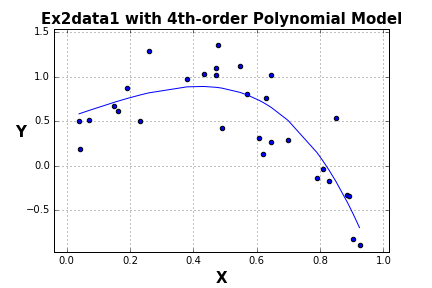

In [14]:
data_plotter('Ex2data1 with 4th-order Polynomial Model')
W0, W1, W2, W3, W4 = [float(w) for w in min(results)[-1]]
model = lambda x: W0 + W1*x + W2*x**2 + W3*x**3 + W4*x**4
model_plotter(model)

## 1-4 Fit the data using 16th order polynomial regression model (matrix form, gradient descent method). Plot the data with the fitted line. Print optimized weights. Print Root Mean Squared Error (RMSE). Note: Do not forget feature normalization.

### Initialize data, labels, and weights

In [15]:
X = np.stack([
        np.ones(len(data)),
        scale(data.iloc[:, 0]),
        scale(list(map(lambda x: x**2, data.iloc[:, 0]))),
        scale(list(map(lambda x: x**3, data.iloc[:, 0]))),
        scale(list(map(lambda x: x**4, data.iloc[:, 0]))),
        scale(list(map(lambda x: x**5, data.iloc[:, 0]))),
        scale(list(map(lambda x: x**6, data.iloc[:, 0]))),
        scale(list(map(lambda x: x**7, data.iloc[:, 0]))),
        scale(list(map(lambda x: x**8, data.iloc[:, 0]))),
        scale(list(map(lambda x: x**9, data.iloc[:, 0]))),
        scale(list(map(lambda x: x**10, data.iloc[:, 0]))),
        scale(list(map(lambda x: x**11, data.iloc[:, 0]))),
        scale(list(map(lambda x: x**12, data.iloc[:, 0]))),
        scale(list(map(lambda x: x**13, data.iloc[:, 0]))),
        scale(list(map(lambda x: x**14, data.iloc[:, 0]))),
        scale(list(map(lambda x: x**15, data.iloc[:, 0]))),
        scale(list(map(lambda x: x**16, data.iloc[:, 0])))],
        axis=1)
y = np.asmatrix(data.iloc[:, -1]).reshape(len(data), -1)

W_init = np.asmatrix(np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]).reshape(-1, 1))
W = np.copy(W_init)

### Perform matrix form gradient descent on the first dataset to fit a 16th order polynomial model

In [16]:
"""
The best model has:
    RMSE = 0.3086079143912908
    learning rate = 0.1
    W = 0.613943838861208
        0.7441499391915972
        -0.18117241631995182
        -0.46843320017963214
        -0.4722378591495171
        -0.3818489274944494
        -0.2751600307992868
        -0.1808922151646224
        -0.10729145199029261
        -0.05446227407685552
        -0.019640775979192355
        0.0005980015067956635
        0.009476086981460225
        0.009731783459828057
        0.003581925042287819
        -0.007224500051137728
        -0.0213272572351831
"""

results = train_model(X, y, learning_rates)

Initial RMSE: 0.7335894087051757
Performing gradient descent with a learning rate of 0.1

	Final RMSE:      0.3086079143912908 achieved after 0.02 seconds 651 iterations

Performing gradient descent with a learning rate of 0.01

	Final RMSE:     0.33112371167648186 achieved after 0.01 seconds 362 iterations

Performing gradient descent with a learning rate of 0.001

	Final RMSE:    0.33888556766994343 achieved after 0.05 seconds 2043 iterations

Performing gradient descent with a learning rate of 0.0001

	Final RMSE:   0.3943106601049357 achieved after 0.28 seconds 9905 iterations


The best model has:
	RMSE = 0.3086079143912908
	learning rate = 0.1
	W = 0.613943838861208
	    0.7441499391915972
	    -0.18117241631995182
	    -0.46843320017963214
	    -0.4722378591495171
	    -0.3818489274944494
	    -0.2751600307992868
	    -0.1808922151646224
	    -0.10729145199029261
	    -0.05446227407685552
	    -0.019640775979192355
	    0.0005980015067956635
	    0.009476086981460225
	    0.0097

### Plot first dataset with the 16th order polynomial model fit to it

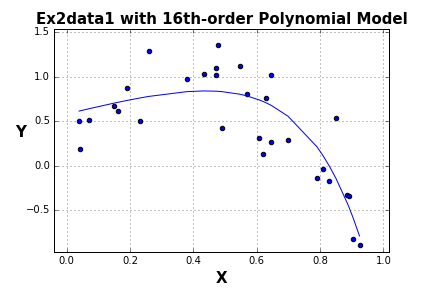

In [17]:
data_plotter('Ex2data1 with 16th-order Polynomial Model')
W0, W1, W2, W3, W4, W5, W6, W7, W8, W9, W10, W11, W12, W13, W14, W15, W16 = [float(w) for w in min(results)[-1]]
model = lambda x: W0 + W1*x + W2*x**2 + W3*x**3 + W4*x**4 + W5*x**5 + W6*x**6 + W7*x**7 + W8*x**8 + W9*x**9 \
                + W10*x**10 + W11*x**11 + W12*x**12 + W13*x**13 + W14*x**14 + W15*x**15 + W16*x**16
model_plotter(model)

## 1-5 Fit the data using 16th order polynomial regression model with ridge (L2 penalty) regularization (matrix form, gradient descent method). You need to try at least 3 different L2 penalty (for example, λ = 0.1, 1, 10). Plot the data with the fitted line. Print optimized weights. Print Root Mean Squared Error (RMSE). Note: Do not forget feature normalization.

### Split data and labels into training, validation, and testing sets

In [18]:
X_, X_test, y_, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = model_selection.train_test_split(X_, y_, test_size=0.25, random_state=42)

### Perform matrix form gradient descent on the first dataset to fit a 16th order polynomial L2 regularized model 

In [19]:
results = train_model(X_train, y_train, learning_rates, test_split=(X_test, y_test))

Initial RMSE: 0.2688882285003497
Performing gradient descent with a learning rate of 0.1

	Final RMSE:      0.23192771589153094 achieved after 0.00 seconds 30 iterations

Performing gradient descent with a learning rate of 0.01

	Final RMSE:     0.23232452104068327 achieved after 0.01 seconds 238 iterations

Performing gradient descent with a learning rate of 0.001

	Final RMSE:    0.23900655252620112 achieved after 0.04 seconds 1608 iterations

Performing gradient descent with a learning rate of 0.0001

	Final RMSE:   0.30608937810747183 achieved after 0.18 seconds 6898 iterations


The best model has:
	RMSE = 0.1609521250764239
	learning rate = 0.1
	W = 0.6663061089860575
	    0.17167853939515737
	    -0.009037103863303347
	    -0.09251849495183137
	    -0.1281221245785187
	    -0.1417461109721105
	    -0.14514864570512181
	    -0.1438406563899137
	    -0.140485571570787
	    -0.1363841865658078
	    -0.13216447898569877
	    -0.12811681495250357
	    -0.12436154100048111
	    -0.120

### Redefine cost and cost derivative functions to include the L2 regularization term; initialize lambda values

In [20]:
J = lambda X, y: (1/len(data)) * (np.dot((np.dot(X, W) - y).T, np.dot(X, W) - y) \
        + np.multiply(l, np.dot(W.T, W)))
dJ_dW = lambda X, y: (2/len(data)) * (np.dot(np.dot(X.T, X), W) - np.dot(X.T, y) \
        + np.multiply(l, np.dot(np.eye(W.shape[0]), W)))
lambdas = [1e-4, 1e-3, .01, .1, 1, 10]

### Reinitialize weights to optimal values found during training

In [21]:
W_init = np.asmatrix(np.array([float(w) for w in min(results)[-1]]).reshape(-1, 1))
W = np.copy(W_init)

### Retrain model on validation set to find optimal lambda for L2 regularization

In [23]:
"""
The best model has:
    RMSE = 0.1540494501347632
    learning rate = 0.1
    lambda: 0.0001
    W = 0.6358952591235019
        0.6219677739001154
        -0.14612902176818804
        -0.39606056192602906
        -0.4114674129026127
        -0.3454420309914594
        -0.2620285474529171
        -0.18560357626432217
        -0.1238000843601949
        -0.07743573176604786
        -0.04480625474240866
        -0.02351534512504669
        -0.011214511957475219
        -0.005862949116504164
        -0.005782604296740594
        -0.00963260744496691
        -0.016357973948309068
"""

learning_rate = min(results)[1]
reg_results = []
for l in lambdas:
    print('Performing gradient descent with an L2 regularization parameter of {}\n'.format(l))
    reg_results.append(train_model(X_val, y_val, [learning_rate], suppress_results=True, test_split=(X_test, y_test))[0] + [l])

print('\nThe best model has:\n\tRMSE = {}\n\tlearning rate = {}\n\tlambda: {}\n\tW = {}'.format(min(reg_results)[0], min(reg_results)[1], min(reg_results)[3], '\n\t    '.join([str(float(r)) for r in min(reg_results)[2]]))) 

Performing gradient descent with an L2 regularization parameter of 0.0001

Initial RMSE: 0.21647789772626652
Performing gradient descent with a learning rate of 0.1

	Final RMSE:      0.15492475802417266 achieved after 0.02 seconds 460 iterations

Performing gradient descent with an L2 regularization parameter of 0.001

Initial RMSE: 0.15505885590929327
Performing gradient descent with a learning rate of 0.1

	Final RMSE:      0.1551833281835424 achieved after 0.03 seconds 457 iterations

Performing gradient descent with an L2 regularization parameter of 0.01

Initial RMSE: 0.15651021034892632
Performing gradient descent with a learning rate of 0.1

	Final RMSE:      0.15786890916490642 achieved after 0.02 seconds 421 iterations

Performing gradient descent with an L2 regularization parameter of 0.1

Initial RMSE: 0.16978434802752151
Performing gradient descent with a learning rate of 0.1

	Final RMSE:      0.18104826887655476 achieved after 0.00 seconds 14 iterations

Performing gradi

### Plot first dataset with the 16th order polynomial L2 regularized model fit to it

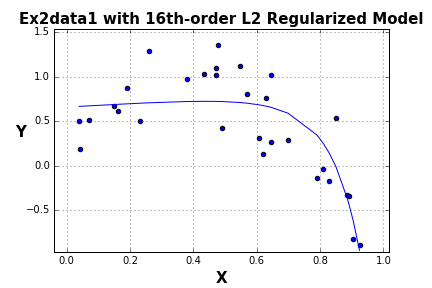

In [24]:
data_plotter('Ex2data1 with 16th-order L2 Regularized Model')
W0, W1, W2, W3, W4, W5, W6, W7, W8, W9, W10, W11, W12, W13, W14, W15, W16 = [float(w) for w in min(results)[-1]]
model = lambda x: W0 + W1*x + W2*x**2 + W3*x**3 + W4*x**4 + W5*x**5 + W6*x**6 + W7*x**7 + W8*x**8 + W9*x**9 \
                + W10*x**10 + W11*x**11 + W12*x**12 + W13*x**13 + W14*x**14 + W15*x**15 + W16*x**16
model_plotter(model)

## 1-6 Fit the data using 16th order polynomial regression model with scikit-learn Ridge model. You need to try at least 3 different L2 penalty (for example, λ = 0.1, 1, 10). Plot the data with the fitted line. Print optimized weights. Print Root Mean Squared Error (RMSE).

### Initialize data, labels, and weights



### Fit the first dataset to a 16th order polynomial L2 regularized model using scikit-learn 

### Plot first dataset with the 16th order polynomial L2 regularized model fit to it

## 1-7 Fit the data using 16th order polynomial regression model with scikit-learn Lasso model. You need to try at least 3 different L1 penalty (for example, λ = 0.1, 1, 10). Plot the data with the fitted line. Print optimized weights. Print Root Mean Squared Error (RMSE).

### Fit the first dataset to a 16th order polynomial L1 regularized model using scikit-learn 

### Plot first dataset with the 16th order polynomial L1 regularized model fit to it